# Supervised Classification

## Definition
Supervised classification in natural language processing (NLP) is a machine learning task where a model is trained to assign a class label to a piece of text.

> The model is **trained on a dataset of labeled text**, which means that each piece of text is already assigned a class label.
Once the model is trained, it can be used to predict the class label of new, unseen text.

---
<footnote>
References<br>
* Bard. (2023, October 31). Bard: A large language model from Google AI [Computer software]. Google AI.
</footnote>

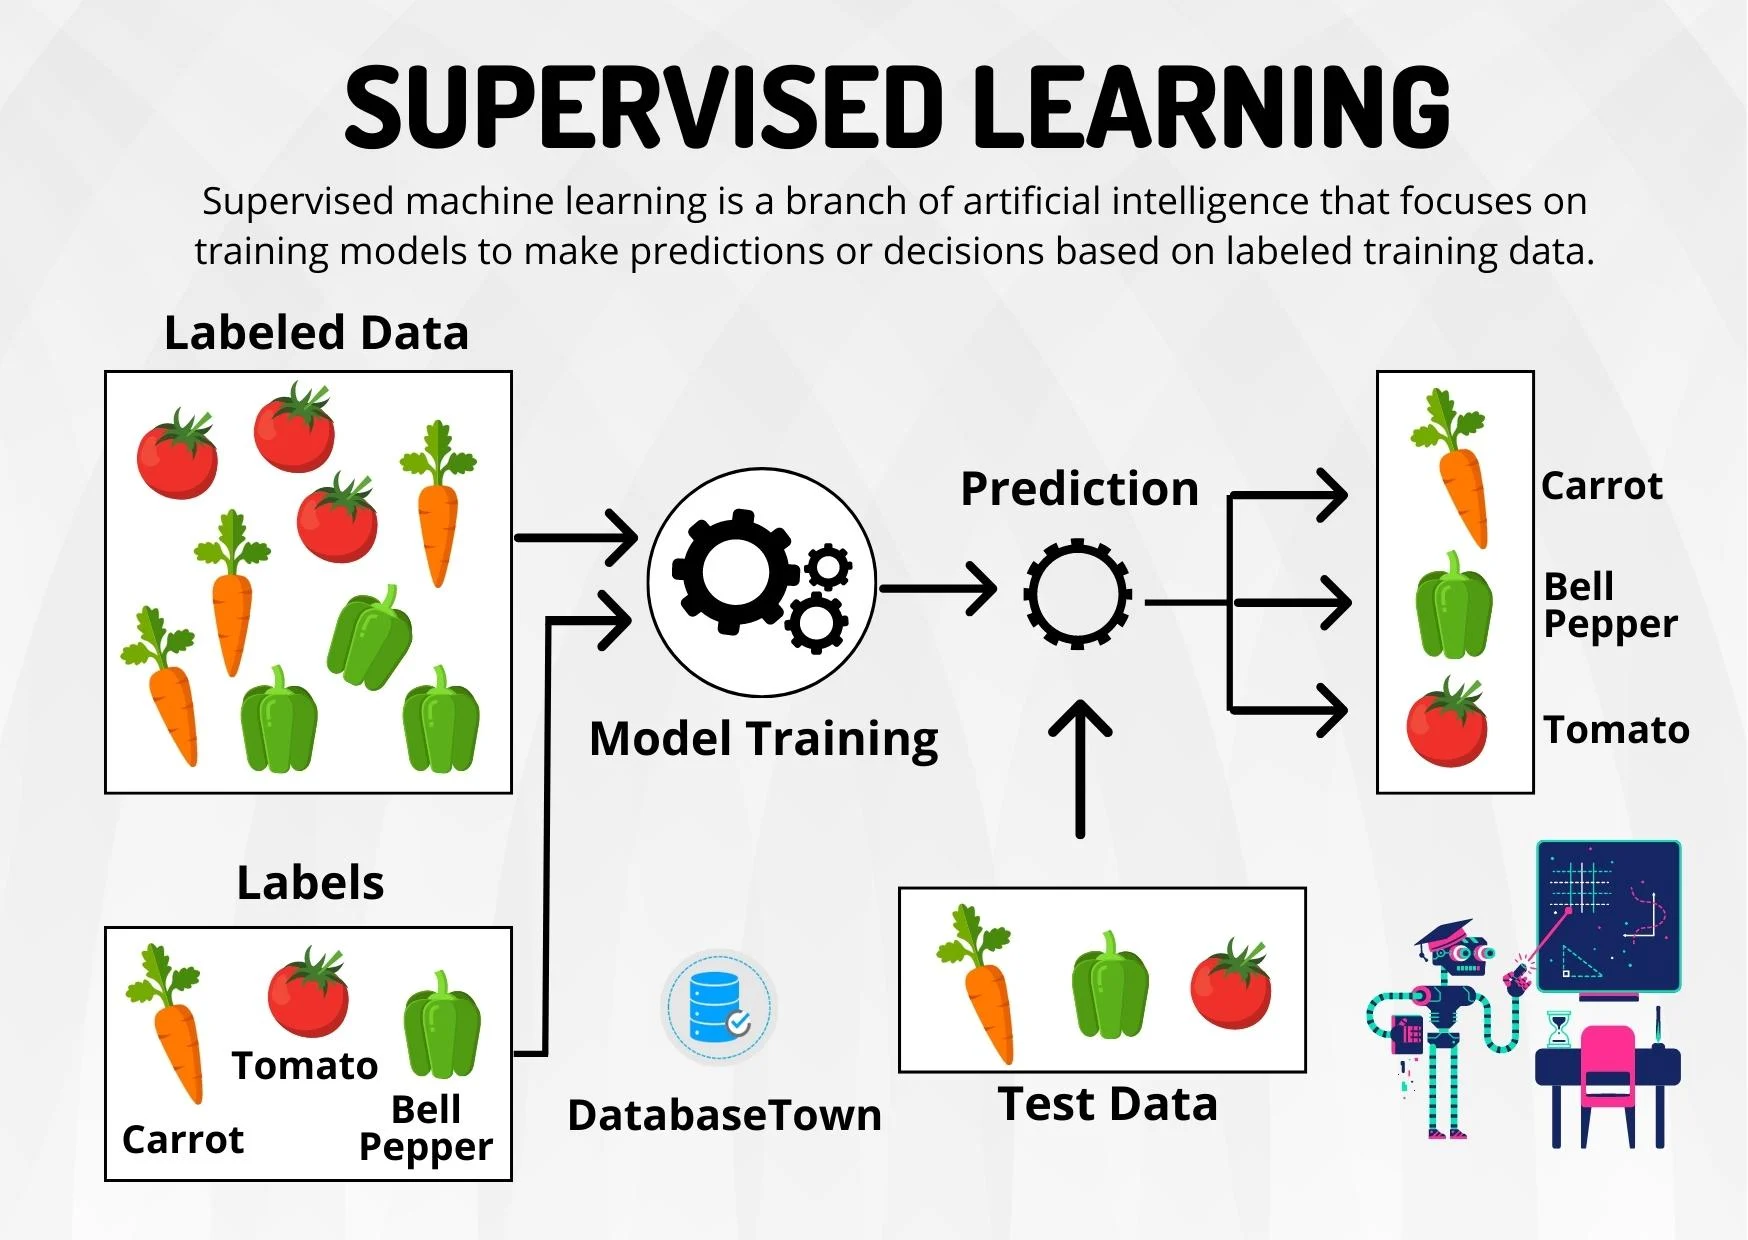

## Types of NLP Tasks

Supervised classification is used in a wide variety of NLP tasks, such as:

* **Sentiment analysis**: Classifying text as positive, negative, or neutral.
* **Spam detection**: Classifying emails as spam or not spam.
* **Topic classification**: Classifying news articles into different topic categories, such as sports, business, and politics.
* **Intent classification**: Classifying user queries in chatbot applications.
* **Language identification**: Classifying text into different languages.
* **Author detection**: Classify text into different authors



## Dataset

To train a supervised classification model, you need a dataset of labeled text data.

> The dataset should contain a variety of examples of the different categories that you want your model to be able to classify. For example, if you are training a sentiment analysis model, your dataset should contain examples of positive, negative, and neutral text.

## Algorithms

Once you have a dataset of labeled text data, you can use a variety of different machine learning algorithms to train your model. Some popular algorithms for supervised text classification include:

* Naive Bayes
* Logistic regression
* Support vector machines (SVMs)
* Random forests
* Neural networks


# Steps to Apply Supervised Classification in NLP

0. **Collect a labeled dataset**. This dataset should contain a set of text data points and their corresponding target variables. For example, if you are building a spam filter, your dataset would contain a set of email messages and their corresponding labels (spam or not spam).

1. **Preprocess the text data**. This may involve cleaning the text, removing stop words, and stemming or lemmatizing the words.

2. **Extract features from the text data**. This may involve using a bag-of-words model, a TF-IDF model, or other NLP feature extraction techniques.  A common feature extraction technique is the bag-of-words (BOW) model, which represents each text sample as a vector of word counts.

3. **Choose a machine learning algorithm**. There are many different machine learning algorithms that can be used for supervised classification, such as logistic regression, support vector machines, and decision trees.

4. **Train the machine learning model**. This involves feeding the labeled dataset to the machine learning algorithm, which will learn to associate the features with the category labels.

5. **Evaluate the model on a held-out test set**. This involves testing the model on a held-out test dataset, which is a set of labeled data that was not used to train the model. This will give you an estimate of how well the model will generalize to new data.

6. **Deploy the model to production**. Once you are satisfied with the performance of the trained model, you can deploy it to production. This means making the model available to users so that they can classify new text samples.This may involve saving the model to a file or deploying it to a cloud-based service.

# Supervised classification for **author detection** using the **BOW model**

Author detection is the task of identifying the author of a given text sample. This can be a challenging task, as many authors have similar writing styles. However, supervised classification can be used to train a model to identify authors with a high degree of accuracy.

## Steps to apply supervised classification for Author Detection

To use a BOW model for author detection, the following steps can be followed:

0. **Collect a dataset of text passages from different authors**. The dataset should contain a set of text passages, each labeled with the name of the author.

1. **Preprocess the data**. This may involve cleaning the data, removing stop words, and converting the data to a numerical representation.

2. **Create a BOW model for each author**. This involves creating a vector of word counts for each text passage in the dataset. The vector of word counts represents the features of the text passage.

3. **Train a machine learning algorithm**. A machine learning algorithm, such as logistic regression or support vector machines, can be trained to predict the author of a new text passage based on the features of the text passage.

4. **Evaluate the model**. The model is evaluated on a held-out test set. This involves predicting the author of the text passages in the test set and comparing the predictions to the true authors.

5. **Deploy the model**. Once the model is trained and evaluated, it can be deployed to production. This means that the model can be used to predict the author of new text passages.

# Step 0: Collect a dataset of text passages from different authors

The dataset should contain a set of text passages, each labeled with the name of the author.

```
dataset = {author:['text', 'text', ...], author:['text', 'text', ...], ...}
```



## The dataset

We'll use a sample dataset for this demonstration.



The name of the dataset to be used is given in compressed format:

```
30Columnists.zip
```

It contains 1500 texts (articles) from 30 authors (i.e. 50 texts for each author) and will be red into a dictionary:

```
dataset:{author:[docs]}
```

**Compressed File Content:**

“Raw_texts” folder includes 1500 English Columns (i.e., texts, articles) belonging 30 different Columnists (i.e., authors)

**Content of the root directory**

*  `Raw_texts` folder
*  `Arff_files` folder
*  `okubeni.doc`
*  `readme.doc`

---

**Credits & Date**
*  Generated by: Şevket YURDACAN, M. Fatih AMASYALI – Yildiz Technical University, Computer Eng. Dept. Istanbul, Turkey
*  Last Modified: February 5, 2010


## Prepare the dataset


> Get (upload) the 30columnist.zip file

In [3]:
from google.colab import files
uploaded = files.upload()

Saving 30Columnists.zip to 30Columnists.zip


>  Unzip it

In [4]:
!unzip /content/30Columnists.zip -d /content

Archive:  /content/30Columnists.zip
  inflating: /content/30Columnists/~$kubeni.doc  
  inflating: /content/30Columnists/~$readme.doc  
  inflating: /content/30Columnists/~WRL0001.tmp  
  inflating: /content/30Columnists/~WRL0003.tmp  
   creating: /content/30Columnists/arff_files/
  inflating: /content/30Columnists/arff_files/2gram.arff  
  inflating: /content/30Columnists/arff_files/LSI50.arff  
  inflating: /content/30Columnists/arff_files/numbers.arff  
  inflating: /content/30Columnists/arff_files/stanford_postagger_tags.arff  
  inflating: /content/30Columnists/arff_files/words_min50.arff  
  inflating: /content/30Columnists/arff_files/wordstems_min50.arff  
  inflating: /content/30Columnists/okubeni.doc  
   creating: /content/30Columnists/raw_texts/
   creating: /content/30Columnists/raw_texts/1/
  inflating: /content/30Columnists/raw_texts/1/1.1.txt  
  inflating: /content/30Columnists/raw_texts/1/1.10.txt  
  inflating: /content/30Columnists/raw_texts/1/1.11.txt  
  inflating

## Read the articles for each author from the directory

Create the `dataset`

In [5]:
# Read sub-dirs as author names, i.e. labels
import os
data_path = "/content/30Columnists/raw_texts";

labels = [];
for author in os.listdir(data_path):
  labels.append(author);

labels.sort(key=lambda e : int(e));
print(labels)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


In [6]:
# Read articles of each author
import re
dataset = {}; # {author:[docs]}
for author in labels:
    docs = [];
    for file in os.listdir(os.path.join(data_path, author)):
      if file.endswith('.txt'):
        with open(os.path.join(data_path, author, file), 'rb') as f:
          # read the article line by line
#          article = f.read().decode('cp1254').replace('\n', '')..replace('\r', '').replace('\f', '');
#          article = f.read().decode('iso-8859-9').replace('\n', '').replace('\r', '').replace('\f', '');
          article = f.read().decode('iso-8859-9');

          # make a basic cleaning, i.e., remove non printable chars like lf, cr, ff etc.
          article = re.sub(r"[\n\r\f]", "", article);
          docs.append(article);
#    print("# of files red for author {} is {}".format(author, len(docs)));
    dataset.update({author:docs});

# print the number of articles red for each author
for author in labels:
  print("{} \t {}".format(author, len(dataset[author])));

1 	 50
2 	 50
3 	 50
4 	 50
5 	 50
6 	 50
7 	 50
8 	 50
9 	 50
10 	 50
11 	 50
12 	 50
13 	 50
14 	 50
15 	 50
16 	 50
17 	 50
18 	 50
19 	 50
20 	 50
21 	 50
22 	 50
23 	 50
24 	 50
25 	 50
26 	 50
27 	 50
28 	 50
29 	 50
30 	 50


> Let's make a check to see if everything is OK!

if everything is OK, we will see the first 20 chars of the first 5 articles for each author in a row

In [7]:
for author in dataset:
  print("%s\t" % author, *[text[:20] for text in dataset[author][0:5]], sep=" | ");

1	 | HOW was it for you?  | THE physical develop | IT'S hard to walk in | JUST how deep and ho | WHAT a joy to see th
2	 | IT IS less than six  | CHERIE BLAIR was fur | PLANS for a new Fort | IT was flagged up as | JUST when she though
3	 | ONE of my tasks ever | WELL, who'd have tho | ONE commentator on r | HERE'S tae us. Wha's | ALISTAIR DARLING is 
4	 | TIWONDER if Iain Gra | POLITICAL nostalgia  | NOT long ago I took  | NOT for the first ti | A FRIEND was recentl
5	 | Tonight President Ge | Its very easy, in o | Crises abound in our | I know its been a t | The clamor for Hilla
6	 | Gordon Brown has onl | The biggest worry fo | As many as two in fi | BRITISH politics is  | Demands for an apolo
7	 | It's all too rare th | In a church hall thr | I'm not writing from | I grabbed breakfast  | I'm afraid what foll
8	 | A hair opinion poll  | The people at UK Ath | A hair opinion poll  | Sir Alex Ferguson, t | The most over worn s
9	 | A jab to beat prosta | Prince Charles has b | Franc

In [8]:
# We can use pandas for a better looking table to do the same
import pandas as pd

df = pd.DataFrame.from_dict(dataset); # doc-by-author table
#df.head()
df

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,HOW was it for you? Have you already had the R...,IT IS less than six months since Scots went to...,ONE of my tasks every Monday is to table a que...,TIWONDER if Iain Gray did a dry run before tha...,Tonight President George W. Bush bids adieu to...,Gordon Brown has only put off the inevitable d...,It's all too rare that we get the chance to pr...,A hair opinion poll sounds like the sort of tr...,"A jab to beat prostate, bowel and kidney cance...","A fortnight tomorrow, Gordon Brown will make h...",...,"Unlike most of Europe, Japan seems to have no ...",England have summoned the ­country's top refer...,"As the mom of a three year old, I can relate t...",Prostate cancer is the most common cancer in m...,The last few weeks we looked at how the health...,"LEAVE them, they'll get tired soon enough. Tha...",In some of the last few items on my Global TV ...,THANK YOU Cashley. You are the most despised...,Many public services are less reliable on week...,Meltdowns aren't all bad. The current one in f...
1,THE physical development of Edinburgh is at a ...,CHERIE BLAIR was furious when Gordon Brown vet...,"WELL, who'd have thought it? Mild-mannered, se...","POLITICAL nostalgia is beguiling, and there's ...","Its very easy, in our chaotic world, to lose ...",The biggest worry for ministers now is what to...,In a church hall three miles west of Leeds's s...,The people at UK Athletics are upset that I do...,Prince Charles has been accused of  exploitin...,"To paraphrase Neville Chamberlain, the Balkans...",...,President Barack Obama gave a number of reason...,It is Scotland's misfortune today to be facing...,There are those that say we are raising a gene...,"In our lives, we have all known or heard about...",Last column we talked about strategies to save...,THERE must be a crisis cloud looming permanent...,"I hate to admit this, but my wife is probably ...",A desperate club have appointed a desperate ma...,Any link between sugar and acne has long been ...,"Some of the stories are horrific. Nour Miyati,..."
2,IT'S hard to walk into a high street shop thes...,PLANS for a new Forth Road Bridge have almost ...,"ONE commentator on radio, who didn't sound as ...",NOT long ago I took my sons on a Saturday afte...,"Crises abound in our troubled world, but think...",As many as two in five of us think that local ...,I'm not writing from the press centre at the G...,A hair opinion poll sounds like the sort of tr...,France has begun a crackdown on children havin...,Someone who sees a lot of the Prime Minister r...,...,"Right from the start of the banking crisis, Ba...",Four weeks today the remaining pieces of the p...,Exercise is only half of the equation when it ...,"Recently, a new technology has become availabl...",Hello there ! Im happy and honored to be a pa...,THE history of popular music has always featur...,Many studies have shown that the more educatio...,HERES a statistic for you  this weekend was ...,Manipulating your neck is supposed to relieve ...,You tend to wish that John F. Ferguson had got...
3,JUST how deep and how long will Britain's econ...,IT was flagged up as the biggest test of the S...,"HERE'S tae us. Wha's like us? Well, Argentinea...","NOT for the first time, Donald Findlay QC is w...","I know its been a tough week, little Obamaite...",BRITISH politics is now about who can claim th...,I grabbed breakfast and left the house early t...,"Sir Alex Ferguson, the Manchester United manag...",DVDs and videos designed to help babies learn ...,Eight members of the cabinet joining the dole ...,...,One of the reasons why stock markets are still...,England will announce at least one change toda...,"For many teens, its a rite of passage to star...","In a previous column, I have talked about gett...",I like learning new words. And every year ther...,JE JE je. That's how the Spanish render in pri...,This study (see 2 previous items) raises sever...,ROY Keane is continuing to

# Step 1: Preprocess the data

This may involve cleaning the data, removing stop words, and converting the data to a numerical representation.

```
dataset_tokenized = {author:[ ['token', 'token',..], ['token', token',..], ...];
```

## Pre-flight

### Tokenization

> We will use NLTK tokenizer

#### Apply tokenization to a sample of articles

> Say, the first article of the first author.

In [9]:
import nltk
nltk.download('punkt'); # NLTK uses punkt (punktuation) tokenizer, so it needs the data.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


> Just apply the tokenizers to the first article of the first author and see if it works as we expected.

In [ ]:
from nltk import sent_tokenize, word_tokenize
# Sentence Tokenization for a single document, the first document of the first author
sentences = sent_tokenize(dataset['1'][0])
sentences

In [ ]:
# Word tokenization
tokens = word_tokenize(dataset['1'][0]);
tokens

**!!! There is something that is unsual !!!**
> We have "\x96", which is the hexadecimal encoding of non-breaking hyphen, i.e., "-".

The "\x96" character is a non-breaking hyphen. It is a Unicode character that is used to indicate that a hyphen should not be broken at the end of a line. This is useful for preventing words from being hyphenated incorrectly, such as in the case of compound words or proper nouns.

**Examples**

Compound words:
* `Mother-in-law`
* `Sister-in-law`
* `Self-esteem`
* `Self-confidence`

Proper nouns:
* `O'Reilly Media`
* `Mac-11`
* `AT&T`

Other examples:
* `URL(https://example.com/my-page)`
* `ISBN(978-0-306-81274-5)`

The non-breaking hyphen character can also be used to prevent fractions from being broken at the end of a line:

* `1/2`
* `3/4`
* `5/6`

<br>

---

**Solution**

Either,
> Add the "\x96" char to the regex while reading the file
```
article = re.sub(r"[\n\r\f\x96]", "", article);
```
check again if everything is OK in that time.

or

> continue to next session, because "\x96" is to be removed along with the punctuation removal procedure.

### Handle Punctuations

> Check the most frequent words in this time, for instance, whether they are OK!

In [12]:
# First check how many sentences and tokens we have in a single article
print(len(sentences),len(tokens))

21 895


In [ ]:
# Check frequency distribution of the tokens/words of the article
from nltk.probability import FreqDist
fdist = FreqDist(tokens);
fdist.most_common(20)

**!!! There is something unsual !!!**
> There are punctuations as tokens as the most frequent tokens, e.g., ".", ",", etc.


---

**Solution**

Remove the punctuations.

```
tokens_with_no_punc = [w for w in tokens if w.isalpha()];

```
The code does that:

* it iterates over the list `tokens`.
* for each token in the list, it checks if the token is alphabetic using the `w.isalpha()` method.
* if the token is alphabetic, it is added to the new list `tokens_with_no_punc`.


> Apply the solution and check if everything is OK.

**Remove punctuations**

In [14]:
tokens_no_punc = [token for token in tokens if token.isalpha()];

fdist = FreqDist(tokens_no_punc);
fdist.most_common(10)

[('the', 49),
 ('of', 32),
 ('and', 27),
 ('Christmas', 20),
 ('to', 19),
 ('we', 13),
 ('a', 12),
 ('it', 11),
 ('that', 11),
 ('is', 11)]

### Normalize tokens

> make all tokens lowercased.

In [ ]:
tokens_normalized = [token.lower() for token in tokens if token.isalpha()];

fdist = FreqDist(tokens_normalized);
fdist.most_common(10)

### Stopword removal

> We again use the NLTK's stopwords to remove

In [ ]:
from nltk.corpus import stopwords;
nltk.download('stopwords');
stop_words = stopwords.words("english");
stop_words

In [ ]:
clean_tokens = [token for token in tokens_normalized if token not in stop_words];
fdist = FreqDist(clean_tokens);
fdist.most_common(10)

## Apply everything to the whole dataset

> If everything seems OK to you, then tokenize the whole dataset.

In [18]:
# Non-destructive tokenization
from nltk import word_tokenize

dataset_tokenized = {};

for author in dataset:

  tokenized_articles = [];

  for article in dataset[author]:
    tokens = [token.lower() for token in word_tokenize(article) if token.isalpha() and (token.lower()) not in stop_words]
    tokenized_articles.append(tokens)

  dataset_tokenized.update({author: tokenized_articles})



> Ckeck the result of the tokenization

In [22]:
for author in dataset_tokenized:
  print("%s\t" % author, *[article[:5] for article in dataset_tokenized[author][0:5]], sep=" | ");

1	 | ['already', 'rennies', 'resolve', 'ibuprofen', 'cocktail'] | ['physical', 'development', 'edinburgh', 'crucial', 'juncture'] | ['hard', 'walk', 'high', 'street', 'shop'] | ['deep', 'long', 'britain', 'economic', 'recession'] | ['joy', 'see', 'scottish', 'medal', 'winners']
2	 | ['less', 'six', 'months', 'since', 'scots'] | ['cherie', 'blair', 'furious', 'gordon', 'brown'] | ['plans', 'new', 'forth', 'road', 'bridge'] | ['flagged', 'biggest', 'test', 'snp', 'minority'] | ['thought', 'safe', 'go', 'back', 'normal']
3	 | ['one', 'tasks', 'every', 'monday', 'table'] | ['well', 'thought', 'serious', 'suit', 'alistair'] | ['one', 'commentator', 'radio', 'sound', 'though'] | ['tae', 'us', 'wha', 'like', 'us'] | ['alistair', 'darling', 'one', 'pleasant', 'men']
4	 | ['tiwonder', 'iain', 'gray', 'dry', 'run'] | ['political', 'nostalgia', 'beguiling', 'lot', 'around'] | ['long', 'ago', 'took', 'sons', 'saturday'] | ['first', 'time', 'donald', 'findlay', 'qc'] | ['friend', 'recently', 'drivi

In [ ]:
# We can use pandas for a better looking table to do the same
import pandas as pd

df = pd.DataFrame.from_dict(dataset_tokenized); # doc-by-author table
#df.head()
df

# Step 2: Create a BOW model for each author

In [23]:
# List of all tokens in every article in the dataset

# 1. Unpack the list of articals (= a list of tokens) for each author
# => list of the list of tokens for all authors.
token_list = [x for X in dataset_tokenized.values() for x in X]

# 2. Unpack the list of the list of tokens for all authors
# => list of tokens for all articles and all authors
token_list = [x for X in token_list for x in X]

print("The number of tokens in the whole dataset: %d" % len(token_list))

The number of tokens in the whole dataset: 550779


In [24]:
# Examine the most frequent token/words in the whole dataset
from nltk.probability import FreqDist
fdist = FreqDist(token_list);
fdist.most_common(20)

[('would', 3079),
 ('one', 2832),
 ('people', 1917),
 ('said', 1904),
 ('time', 1833),
 ('could', 1789),
 ('like', 1787),
 ('new', 1714),
 ('even', 1696),
 ('also', 1645),
 ('last', 1625),
 ('may', 1486),
 ('first', 1425),
 ('much', 1421),
 ('years', 1362),
 ('get', 1341),
 ('year', 1307),
 ('government', 1283),
 ('two', 1280),
 ('many', 1251)]

In [25]:
# Obtain the vocabulary/lexicon
lexicon = set(token_list)

print("The number of UNIQUE tokens in the whole dataset: %d" % len(lexicon))

The number of UNIQUE tokens in the whole dataset: 34940


> Create `token2idx` and `idx2token` mappings

In [26]:
# token2idx first
token2idx = {};
for idx, token in enumerate(lexicon):
  token2idx.update({token:idx})

print(token2idx)

{'quantify': 0, 'hank': 1, 'swap': 2, 'deans': 3, 'earnestly': 4, 'cutters': 5, 'dispensed': 6, 'coors': 7, 'traveled': 8, 'tidiest': 9, 'nanograms': 10, 'hopping': 11, 'hoops': 12, 'produced': 13, 'truths': 14, 'trader': 15, 'wifeless': 16, 'chained': 17, 'uncharacteristic': 18, 'erotic': 19, 'herzen': 20, 'stringencies': 21, 'ye': 22, 'german': 23, 'two': 24, 'inflationary': 25, 'inexorably': 26, 'attribute': 27, 'henri': 28, 'blanchard': 29, 'commission': 30, 'humphrys': 31, 'drawso': 32, 'orchestrator': 33, 'wanow': 34, 'entombed': 35, 'stottie': 36, 'endoscopy': 37, 'spectacle': 38, 'execute': 39, 'freedoms': 40, 'upright': 41, 'cassie': 42, 'onanism': 43, 'realistically': 44, 'outsmarting': 45, 'laypersons': 46, 'aloof': 47, 'lin': 48, 'bandstand': 49, 'merton': 50, 'fuelling': 51, 'spikes': 52, 'pr': 53, 'ahmadinejad': 54, 'minimise': 55, 'albatross': 56, 'dalí': 57, 'sawdust': 58, 'recovers': 59, 'climatologists': 60, 'underwater': 61, 'marches': 62, 'gastrointestinal': 63, 'eb

In [ ]:
# idx2token mapping;
idx2token = {};
for token in token2idx:
  idx = token2idx.get(token);
  idx2token.update({idx:token});
print(idx2token);

{0: 'haemorrhaging', 1: 'firmament', 2: 'kees', 3: 'landfill', 4: 'earthquakes', 5: 'commanders', 6: 'bower', 7: 'matrices', 8: 'abolished', 9: 'inducement', 10: 'difficult', 11: 'bung', 12: 'homeowners', 13: 'angelo', 14: 'piloting', 15: 'munich', 16: 'innovators', 17: 'cobble', 18: 'typographical', 19: 'stoppard', 20: 'waalwiijk', 21: 'fantastically', 22: 'seasoned', 23: 'overactive', 24: 'lamented', 25: 'friday', 26: 'arbroath', 27: 'warms', 28: 'inhabit', 29: 'keratotomy', 30: 'grasps', 31: 'nuggets', 32: 'rockefeller', 33: 'populist', 34: 'lagers', 35: 'sacchi', 36: 'atheletes', 37: 'abel', 38: 'aircrafts', 39: 'belonging', 40: 'bravely', 41: 'rip', 42: 'twin', 43: 'naprosyn', 44: 'consultancies', 45: 'forecasting', 46: 'postmortems', 47: 'readiness', 48: 'comparison', 49: 'gretna', 50: 'tee', 51: 'grooved', 52: 'squash', 53: 'benches', 54: 'toy', 55: 'leonardo', 56: 'redwood', 57: 'innovations', 58: 'independe', 59: 'kickboxing', 60: 'flouncing', 61: 'operandi', 62: 'fantasists',

> Populate **document vectors** for each article of every author

```
dataset_vectors = {author: [vector, vector, ...], author:[vector, vector, ...], ...]
```

In [37]:
dataset_vectors = {}

for author in dataset_tokenized: # for each author in the dataset
  article_vectors = [ [0]*len(lexicon) for i in range(50) ] # create empty vectors for each article
  for article_vector, article_tokens in zip(article_vectors, dataset_tokenized[author]):
    for token in article_tokens:
      article_vector[token2idx[token]] += 1;
  dataset_vectors.update({author:article_vectors})

print("Length of each article for author 1:", [sum(vec) for vec in dataset_vectors['1']])


Length of each article for author 1: [399, 550, 406, 401, 431, 418, 393, 414, 400, 375, 395, 407, 386, 412, 382, 398, 508, 390, 399, 413, 459, 407, 427, 384, 442, 418, 534, 413, 401, 381, 358, 384, 400, 436, 406, 393, 436, 395, 522, 377, 423, 401, 382, 400, 419, 345, 418, 413, 405, 419]


# Step 3: Train a machine learning algorithm

> Split the dataset into ``train`` and ``test``

In [38]:
# test
test_set = {}
train_set = {}
for author in dataset_vectors:
  test_vectors = dataset_vectors[author][:5] # 10% of 50 articles
  test_set.update({author:test_vectors})

  train_vectors = dataset_vectors[author][5:] # 90% of 50 articles
  train_set.update({author:train_vectors})

print("Test vectors \n", *[(idx+1,vec[:10]) for idx, vec in enumerate(test_set['1'])], sep="\n")
print("Train vectors \n", *[(idx+1,vec[:10]) for idx, vec in enumerate(train_set['1'])], sep="\n")

Test vectors 

(1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(2, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(5, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Train vectors 

(1, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(2, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(3, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(4, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(5, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(6, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(7, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(8, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(9, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(10, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(11, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(12, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(13, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(14, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(15, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(16, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(17, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(18, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(19, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(20, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(21, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
(22, [0, 0, 0, 0, 0, 

> Train the model on ``train_set``

The model is the sum vector over all article vectors for every author.

```
learned_model = {author:author_vector, author:author_vector, ...}
```

In [44]:
learned_model = {}
lexicon_size = len(lexicon)
for author in train_set:
  author_vector = [0]*lexicon_size # create a vector of zeros for the author
  # The model is the sum vector over all article vectors
  for idx in range(lexicon_size):
    author_vector[idx] = sum([val_at_idx for val_at_idx in [vec[idx] for vec in train_set[author]]])
  learned_model.update({author:author_vector})


In [45]:
print("Sum vector for author 1:", learned_model['1'][:100])
print("Sum vector for author 2:", learned_model['2'][:100])
print("Sum vector for author 3:", learned_model['3'][:100])
print("Sum vector for author 4:", learned_model['4'][:100])


Sum vector for author 1: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 32, 0, 0, 0, 0, 0, 5, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 8, 1, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0]
Sum vector for author 2: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 0, 0, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 11, 0, 0, 0, 1, 0, 0, 16, 0, 0, 0, 0]
Sum vector for author 3: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 35, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 0, 13, 4, 0, 0, 0]
Sum vector for 

# Step 4: Evaluate the model

> Make the predictions for the ``test_set`` and calculate accuracy

In [41]:
# prediction function based on cosine similarity
def predict(test_vector, l_model):
  winner = "UNK"
  max_sim = 0;
  test_vector_len = sqrt(sum([i*i for i in test_vector]));
  for author in l_model:
    author_vector = l_model[author]
    sim = sum([i*j for i, j in zip(test_vector,author_vector)]) / ( test_vector_len * sqrt(sum([i*i for i in author_vector])))
    if sim > max_sim:
      winner = author
      max_sim = sim
  return (winner, max_sim)

In [46]:
# Accuracy of the learned model
from math import sqrt;

TP = [];
for author in test_set:
  for test_vector in test_set[author]:
    prediction, sim = predict(test_vector, learned_model);
    if author == prediction:
      TP.append(1)

print("Accuracy: %f " % (sum(TP) / 150))


Accuracy: 0.806667 
